<a href="https://colab.research.google.com/github/vjmiyagi/DS-Unit-2-Linear-Models/blob/master/VJM_LS_DSPT6_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
# '''
# import sys

# # If you're on Colab:
# if 'google.colab' in sys.modules:
#     DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# # If you're working locally:
# else:
#     DATA_PATH = '../data/'
    
# # Ignore this Numpy warning when using Plotly Express:
# # FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
# import warnings
# warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')


In [0]:
# Read New York City apartment rental listing data
# import pandas as pd
# df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
# assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
# df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
#         (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
#         (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.

# Imports and DataFrame 

In [0]:
# Imports
import sys
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

!pip install --upgrade geopandas
%matplotlib inline

import geopandas

!pip install -U pandas-profiling
import pandas as pd
import seaborn as sns

Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.7.0)
     |████████████████████████████████| 256kB 2.8MB/s 
  Found existing installation: pandas-profiling 2.6.0
    Uninstalling pandas-profiling-2.6.0:
      Successfully uninstalled pandas-profiling-2.6.0


In [0]:
# Read New York City apartment rental listing data

url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

df_ny = pd.read_csv(url+'apartments/renthop-nyc.csv')
assert df_ny.shape == (49352, 34)



In [0]:
# Remove outliers:
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes

df_ny = df_ny[(df_ny['price'] >= 1375) & (df_ny['price'] <= 15500) &
        (df_ny['latitude'] >=40.57) & (df_ny['latitude'] < 40.99) & 
        (df_ny['longitude'] >= -74.1) & (df_ny['longitude'] <= -73.38)]

# Colab Forms does not like dashes in var names
df_ny = df_ny.rename(columns={"pre-war": "pre_war"})


In [0]:
df_ny.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre_war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [0]:
# Create a column that is a combo of bed and bath
df_ny['bed_bath'] = df_ny['bedrooms'] + (df_ny['bathrooms']/10)
df_ny.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre_war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,bed_bath
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.15
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.10
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10


In [0]:
#!/usr/bin/env python

# Haversine formula example in Python
# Author: Wayne Dyck

import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [0]:
!pip install reverse-geocode

     |████████████████████████████████| 1.6MB 2.4MB/s 
  Created wheel for reverse-geocode: filename=reverse_geocode-1.4-cp36-none-any.whl size=1637799 sha256=993ceaad8050ac5d505d6b0be4284a69f06188e2fecdf99cd0de96e7087599eb
  Stored in directory: /root/.cache/pip/wheels/80/56/82/529b8b1d91c1ef49fe335d89d61bc4d244b6ed72c5063c55e9
Successfully built reverse-geocode


In [0]:
import reverse_geocode
coordinates = (40.7145,-73.9425), (40.7947,-73.9667)

reverse_geocode.search(coordinates)

[{'city': 'Gramercy Park', 'country': 'United States', 'country_code': 'US'},
 {'city': 'Morningside Heights',
  'country': 'United States',
  'country_code': 'US'}]

In [0]:
df_ny['city'] = 

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre_war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,bed_bath
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.15
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.10
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,1.0,2,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,40.7426,-73.9790,3200,230 E 30 St,medium,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.10
49348,1.0,1,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,40.7102,-74.0163,3950,225 Rector Place,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1.10
49349,1.0,1,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,40.7601,-73.9900,2595,341 West 45th Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10
49350,1.0,0,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,40.7066,-74.0101,3350,37 Wall Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.10


# Data Exploration with pairplot and pandas profiling

In [0]:
# Set up df_ny with no amenities

condition = (df_ny['elevator']==0) &\
            (df_ny['cats_allowed']==0) &\
            (df_ny['hardwood_floors']==0) &\
            (df_ny['dogs_allowed']==0) &\
            (df_ny['doorman']==0) &\
            (df_ny['dishwasher']==0) &\
            (df_ny['no_fee']==0) &\
            (df_ny['laundry_in_building']==0) &\
            (df_ny['fitness_center']==0) &\
            (df_ny['pre_war']==0) &\
            (df_ny['laundry_in_unit']==0) &\
            (df_ny['roof_deck']==0) &\
            (df_ny['outdoor_space']==0) &\
            (df_ny['dining_room']==0) &\
            (df_ny['high_speed_internet']==0) &\
            (df_ny['balcony']==0) &\
            (df_ny['swimming_pool']==0) &\
            (df_ny['new_construction']==0) &\
            (df_ny['terrace']==0) &\
            (df_ny['exclusive']==0) &\
            (df_ny['loft']==0) &\
            (df_ny['garden_patio']==0) &\
            (df_ny['wheelchair_access']==0) &\
            (df_ny['common_outdoor_space']==0)

df1 = df_ny[condition]
# df.drop(['B', 'C'], axis=1)

ny_df = df_ny.drop(['elevator','cats_allowed','hardwood_floors','dogs_allowed',
                    'doorman','dishwasher','no_fee','laundry_in_building',
                    'fitness_center', 'pre_war','laundry_in_unit','roof_deck',
                    'outdoor_space','dining_room','high_speed_internet',
                    'balcony','swimming_pool','new_construction','terrace',
                    'exclusive','loft','garden_patio','wheelchair_access',
                    'common_outdoor_space'], axis=1)


In [0]:
ny_df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,bed_bath
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,3.15
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,2.10
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,1.10
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,1.10
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,4.10


In [0]:
#@title Default title text { run: "auto" }
bedrms = 0 #@param {type:"integer"}


condition = (df1['bedrooms']==bedrms)
df2 = df1[condition]

In [0]:
from pandas_profiling import ProfileReport

In [0]:
profile = ProfileReport(ny_df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

profile.to_file(output_file="ny_df.html")

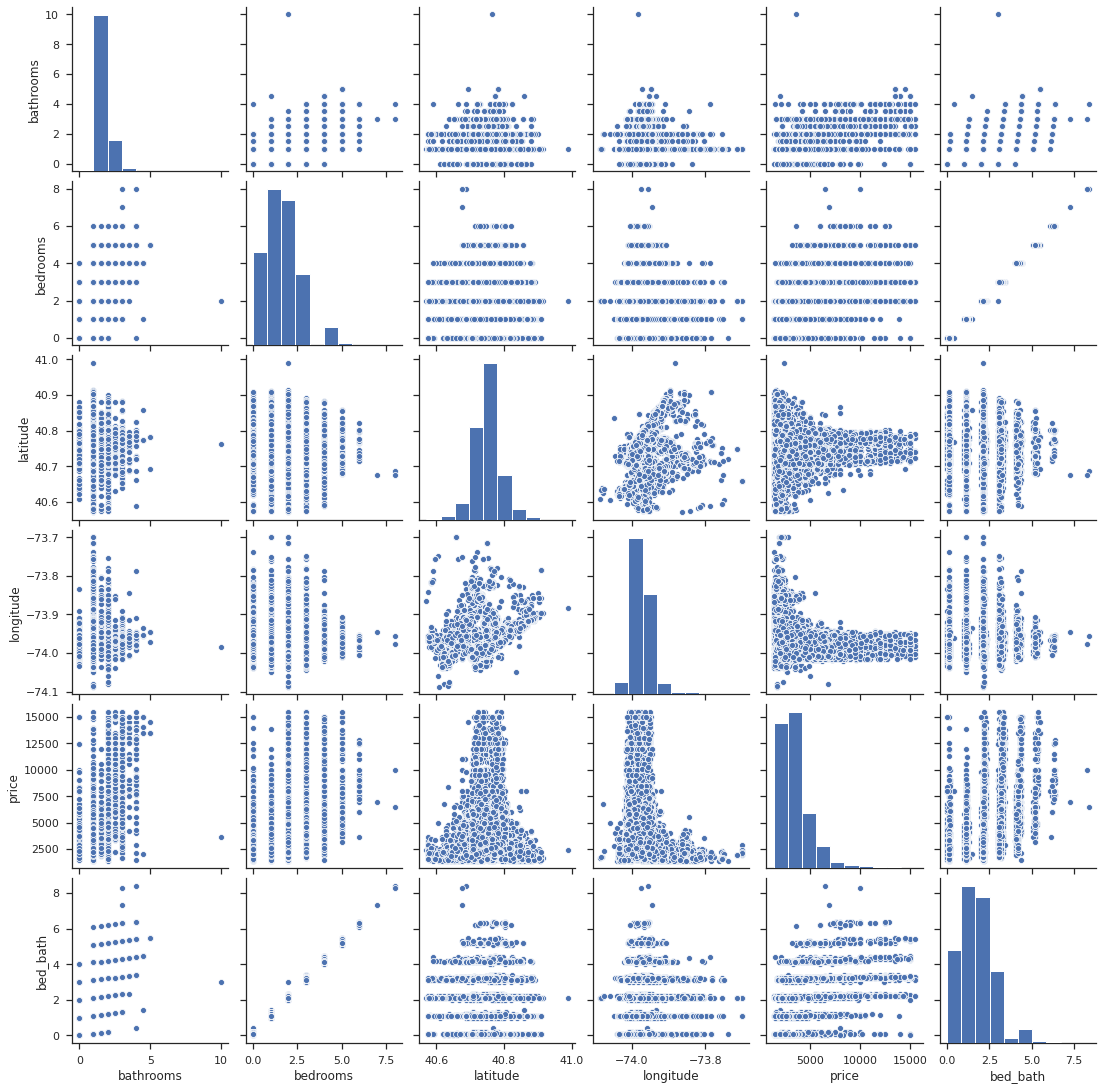

In [0]:
sns.set(style="ticks",color_codes=True)
ny = sns.pairplot(ny_df)

# Linear Regression

- [ ] Organize and comment your code.

In [0]:
print('Please enter an integer from 0 to ', max(df1['bedrooms']))

Please enter an integer from 0 to  6


In [0]:
# X features and Y target vectors
features = ['bed_bath']
target = ['price']

x_train = df2[features]
y_train = df2[target]

- [ ] Use scikit-learn for linear regression with one feature.



In [0]:
# Set up linear regression model
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Fit the model
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predictive Model
df = df2

fig = px.scatter(df, x = 'bed_bath', y = 'price', trendline='ols')
fig.show()
print('Bedrooms are before the decimal point, bathrooms are after.')
print('For example 0.15 indicates zero bedrooms with 1 and 1/2 baths')

Bedrooms are before the decimal point, bathrooms are after.
For example 0.15 indicates zero bedrooms with 1 and 1/2 baths


- [ ] Define a function to make new predictions and explain the model coefficient.

In [0]:
#@title Building Amenities
elevator = False #@param {type:"boolean"}
doorman = False #@param {type:"boolean"}
laundry_in_building = False #@param {type:"boolean"}
fitness_center = False #@param {type:"boolean"}
pre_war = False #@param {type:"boolean"}
roof_deck = False #@param {type:"boolean"}
outdoor_space = False #@param {type:"boolean"}
high_speed_internet = False #@param {type:"boolean"}
swimming_pool = False #@param {type:"boolean"}
new_construction = False #@param {type:"boolean"}
wheelchair_access = False #@param {type:"boolean"}
common_outdoor_space = False #@param {type:"boolean"}



In [0]:
#@title Unit Amenities
cats_allowed = False #@param {type:"boolean"}
hardwood_floors = False #@param {type:"boolean"}
dogs_allowed = False #@param {type:"boolean"}
dishwasher = False #@param {type:"boolean"}
no_fee = False #@param {type:"boolean"}
laundry_in_unit = False #@param {type:"boolean"}
dining_room = False #@param {type:"boolean"}
balcony = False #@param {type:"boolean"}
terrace = False #@param {type:"boolean"}
exclusive = False #@param {type:"boolean"}
loft = False #@param {type:"boolean"}
garden_patio = False #@param {type:"boolean"}



In [0]:
print(df2['latitude'].max())
print(df2['latitude'].min())
print(df2['longitude'].max())
print(df2['longitude'].min())


In [0]:
!pip install --upgrade geopandas
%matplotlib inline
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [0]:
nybb = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', cmap='viridis')

In [0]:
nybb

In [0]:
df = ny_df

fig = px.scatter(df, x = 'latitude', y = 'price', trendline='ols')
fig.show()


In [0]:
!pip install uszipcode

     |████████████████████████████████| 378kB 2.6MB/s 
     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 122kB 5.7MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
  Created wheel for autopep8: filename=autopep8-1.5.2-py2.py3-none-any.whl size=43754 sha256=f6b7350062ac933d83aee64224a8fcb556690020c1cee310d70ce6945ce00cdb
  Stored in directory: /root/.cache/pip/wheels/b0/b0/ba/2ab847c5da4ba60ba4682ba33fcc0783c956cda5ff22b2037f
Successfully built autopep8


In [0]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode

In [0]:
search = SearchEngine()

Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


In [0]:
result = search.by_coordinates(40.7145,-73.9425, radius =1)

In [0]:
# result = pd.DataFrame(result)       

In [0]:
result

[SimpleZipcode(zipcode='11211', zipcode_type='Standard', major_city='Brooklyn', post_office_city='Brooklyn, NY', common_city_list=['Brooklyn'], county='Kings County', state='NY', lat=40.71, lng=-73.95, timezone='Eastern', radius_in_miles=2.0, area_code_list=['347', '718', '917'], population=90117, population_density=39209.0, land_area_in_sqmi=2.3, water_area_in_sqmi=0.07, housing_units=37180, occupied_housing_units=33489, median_home_value=655500, median_household_income=46848, bounds_west=-73.976639, bounds_east=-73.923043, bounds_north=40.727849, bounds_south=40.697636)]

In [0]:
result = None

In [0]:
type(result)

list